<a href="https://colab.research.google.com/github/LuisVielva/covid19/blob/master/covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

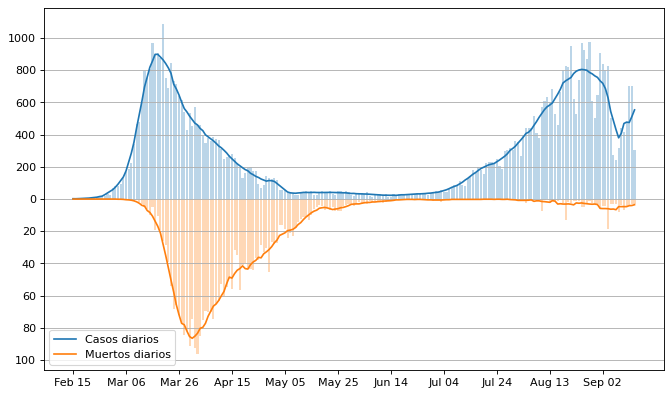

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage.filters import uniform_filter1d
import requests
import re
# plt.style.use('ggplot') 
url = 'https://www.worldometers.info/coronavirus/country/spain/'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
response = requests.get(url, headers=headers)
text = response.text
desde_x = [m.start() for m in re.finditer('categories: \[', text)]
desde_y = [m.start() for m in re.finditer('data: \[', text)]

def devuelveArray(text, desde):
  return text[text.find('[', desde)+1:text.find(']', desde)].replace('"', '').replace('null', '0').split(',')

date = devuelveArray(text, desde_x[1])          # El eje X lo cogemos de desde_x[1]
ncd = np.array([int(x) for x in devuelveArray(text, desde_y[2])]) # Los casos por dia los cogemos de desde_y[2] (MA7 en el 4)
nmd = np.array([int(x) for x in devuelveArray(text, desde_y[7])]) # Las muertes diarias desde_y[7] (MA7 en el 9)

fig=plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(date, ncd, alpha=0.3)
plt.bar(date, -10*nmd, alpha=0.3)
plt.plot(date, uniform_filter1d(ncd, size=7))
plt.plot(date, -10*uniform_filter1d(nmd, size=7))
plt.yticks([-10000, -8000, -6000, -4000, -2000, 0, 2000, 4000, 6000, 8000, 10000], 
           ('100', '80', '60', '40', '20', '0', '200', '400', '600', '800', '1000'))
plt.grid(axis='y')
pos,lab = plt.xticks()
plt.xticks(pos[::20], date[::20])
plt.legend(('Casos diarios', 'Muertos diarios'))

In [ ]:
pos[0::10]

[0,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210]

In [ ]:
lab[-1]

Text(212, 0, 'Sep 14')